# Exploratory Data Analysis - Education

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Read the two datasets into pandas DataFrames
df = pd.read_csv('okcupid_profiles.csv')

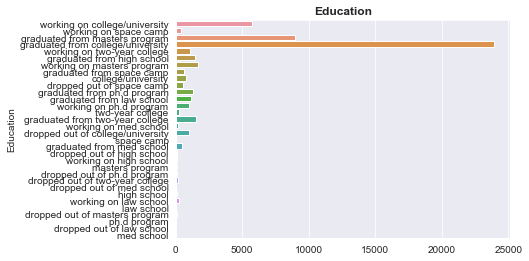

In [8]:
# education
sns.countplot(y='education', data=df)
plt.title("Education", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("")
plt.show()

In [9]:
df['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school', 'med school'], dtype=object)

In [10]:
# Define a mapping dictionary for broader education categories
education_mapping = {
    'working on college/university': 'college/university',
    'working on space camp': 'space camp',
    'graduated from masters program': 'masters program',
    'graduated from college/university': 'college/university',
    'working on two-year college': 'two-year college',
    'graduated from high school': 'high school',
    'working on masters program': 'masters program',
    'graduated from space camp': 'space camp',
    'college/university': 'college/university',
    'dropped out of space camp': 'space camp',
    'graduated from ph.d program': 'ph.d program',
    'graduated from law school': 'law school',
    'working on ph.d program': 'ph.d program',
    'two-year college': 'two-year college',
    'graduated from two-year college': 'two-year college',
    'working on med school': 'med school',
    'dropped out of college/university': 'college/university',
    'space camp': 'space camp',
    'graduated from med school': 'med school',
    'dropped out of high school': 'high school',
    'working on high school': 'high school',
    'masters program': 'masters program',
    'dropped out of ph.d program': 'ph.d program',
    'dropped out of two-year college': 'two-year college',
    'dropped out of med school': 'med school',
    'high school': 'high school',
    'working on law school': 'law school',
    'law school': 'law school',
    'dropped out of masters program': 'masters program',
    'ph.d program': 'ph.d program',
    'dropped out of law school': 'law school',
    'med school': 'med school'
}

# Map the education values to broader categories
df['reduced_education'] = df['education'].map(education_mapping)

# Print the unique values in the new column
print("Different values in the 'broad_education' column:")
print(df['reduced_education'].unique())


Different values in the 'broad_education' column:
['college/university' 'space camp' 'masters program' 'two-year college'
 nan 'high school' 'ph.d program' 'law school' 'med school']


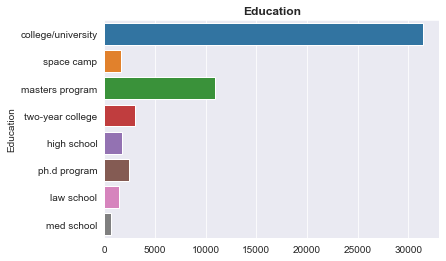

In [11]:
# education
sns.countplot(y='reduced_education', data=df)
plt.title("Education", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("")
plt.show()

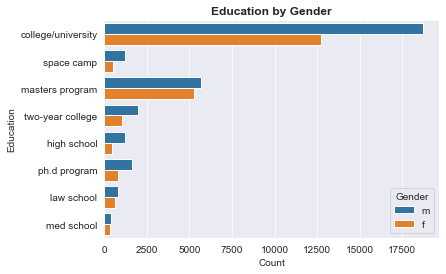

In [12]:
# Plot the distribution of education levels based on gender
sns.countplot(y='reduced_education', hue='sex', data=df)
plt.title("Education by Gender", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Count")
plt.legend(title='Gender')
plt.show()

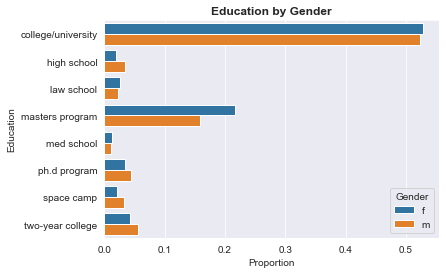

In [14]:
# Calculate normalized counts of education levels by gender
normalized_counts = df.groupby(['sex', 'reduced_education']).size() / df.groupby('sex').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts = normalized_counts.reset_index(name='proportion')

# Plot the distribution of education levels normalized by gender
sns.barplot(y='reduced_education', x='proportion', hue='sex', data=normalized_counts)
plt.title("Education by Gender", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Gender')
plt.show()

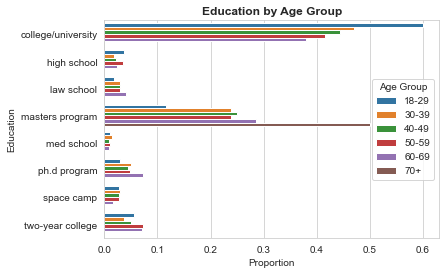

In [16]:
# Define age groups
def categorize_age(age):
    if age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    else:
        return '70+'

# Apply age categorization
df['age_group'] = df['age'].apply(categorize_age)

# Calculate normalized counts of education levels by age group
normalized_counts_age_group = df.groupby(['age_group', 'reduced_education']).size() / df.groupby('age_group').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts_age_group = normalized_counts_age_group.reset_index(name='proportion')

# Plot the distribution of education levels normalized by age group
sns.barplot(y='reduced_education', x='proportion', hue='age_group', data=normalized_counts_age_group)
plt.title("Education by Age Group", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Age Group')
plt.show()

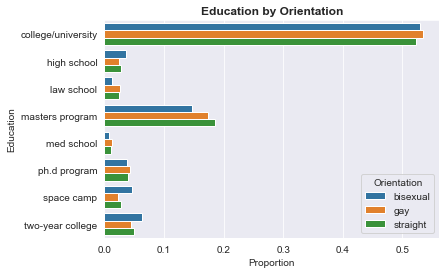

In [17]:
# Calculate normalized counts of education levels by orientation
normalized_counts_orientation = df.groupby(['orientation', 'reduced_education']).size() / df.groupby('orientation').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts_orientation = normalized_counts_orientation.reset_index(name='proportion')

# Plot the distribution of education levels normalized by orientation
sns.barplot(y='reduced_education', x='proportion', hue='orientation', data=normalized_counts_orientation)
plt.title("Education by Orientation", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Orientation')
plt.show()

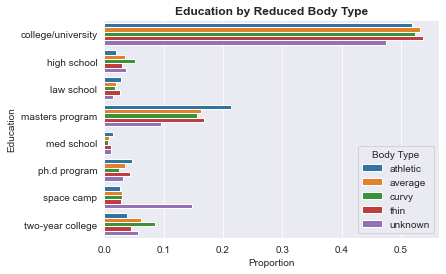

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a mapping dictionary for body types
body_type_mapping = {
    'a little extra': 'curvy',
    'average': 'average',
    'thin': 'thin',
    'athletic': 'athletic',
    'fit': 'athletic',
    'skinny': 'thin',
    'curvy': 'curvy',
    'full figured': 'curvy',
    'jacked': 'athletic',
    'rather not say': 'unknown',
    'used up': 'unknown',
    'overweight': 'curvy',
    # Fill NaN values with 'unknown'
    pd.NA: 'unknown'
}

# Map the body types to broader categories
df['reduced_body_type'] = df['body_type'].map(body_type_mapping)

# Calculate normalized counts of education levels by reduced body type
normalized_counts_reduced_body_type = df.groupby(['reduced_body_type', 'reduced_education']).size() / df.groupby('reduced_body_type').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts_reduced_body_type = normalized_counts_reduced_body_type.reset_index(name='proportion')

# Plot the distribution of education levels normalized by reduced body type
sns.barplot(y='reduced_education', x='proportion', hue='reduced_body_type', data=normalized_counts_reduced_body_type)
plt.title("Education by Reduced Body Type", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Body Type')
plt.show()


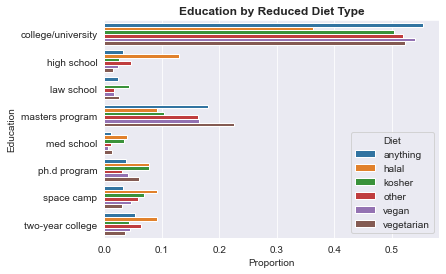

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a mapping dictionary for diet types
diet_mapping = {
    'strictly anything': 'anything',
    'mostly other': 'other',
    'anything': 'anything',
    'vegetarian': 'vegetarian',
    'mostly anything': 'anything',
    'mostly vegetarian': 'vegetarian',
    'strictly vegan': 'vegan',
    'strictly vegetarian': 'vegetarian',
    'mostly vegan': 'vegan',
    'strictly other': 'other',
    'mostly halal': 'halal',
    'other': 'other',
    'vegan': 'vegan',
    'mostly kosher': 'kosher',
    'strictly halal': 'halal',
    'halal': 'halal',
    'strictly kosher': 'kosher',
    'kosher': 'kosher',
    # Fill NaN values with 'unknown'
    pd.NA: 'unknown'
}

# Map the diet types to broader categories
df['reduced_diet'] = df['diet'].map(diet_mapping)

# Calculate normalized counts of education levels by reduced diet type
normalized_counts_reduced_diet = df.groupby(['reduced_diet', 'reduced_education']).size() / df.groupby('reduced_diet').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts_reduced_diet = normalized_counts_reduced_diet.reset_index(name='proportion')

# Plot the distribution of education levels normalized by reduced diet type
sns.barplot(y='reduced_education', x='proportion', hue='reduced_diet', data=normalized_counts_reduced_diet)
plt.title("Education by Reduced Diet Type", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Diet')
plt.show()


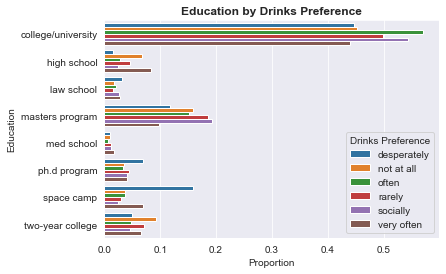

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate normalized counts of education levels by drinks preference
normalized_counts_drinks = df.groupby(['drinks', 'reduced_education']).size() / df.groupby('drinks').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts_drinks = normalized_counts_drinks.reset_index(name='proportion')

# Plot the distribution of education levels normalized by drinks preference
sns.barplot(y='reduced_education', x='proportion', hue='drinks', data=normalized_counts_drinks)
plt.title("Education by Drinks Preference", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Drinks Preference')
plt.show()


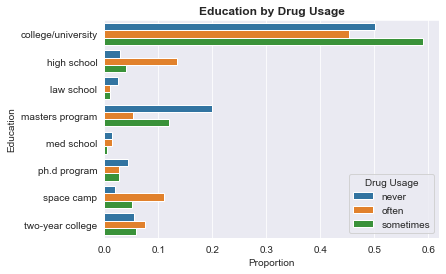

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate normalized counts of education levels by drug usage
normalized_counts_drugs = df.groupby(['drugs', 'reduced_education']).size() / df.groupby('drugs').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts_drugs = normalized_counts_drugs.reset_index(name='proportion')

# Plot the distribution of education levels normalized by drug usage
sns.barplot(y='reduced_education', x='proportion', hue='drugs', data=normalized_counts_drugs)
plt.title("Education by Drug Usage", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Drug Usage')
plt.show()


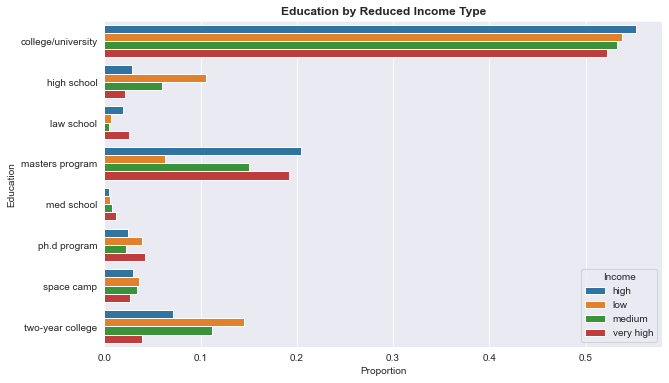

In [34]:
import pandas as pd

# Assuming df is your DataFrame with the income column
# Define the income brackets
income_brackets = {
    'low': (0, 33000),
    'medium': (33000, 53000),
    'high': (53000, 100000)
}

# Function to categorize income
def categorize_income(income):
    for category, (min_income, max_income) in income_brackets.items():
        if min_income <= income < max_income:
            return category
    return 'very high'  # in case income > 100000

# Apply categorization to the income column
df['income_category'] = df['income'].apply(categorize_income)

# Calculate normalized counts of education levels by reduced income type
normalized_counts_reduced_income = df.groupby(['income_category', 'reduced_education']).size() / df.groupby('income_category').size()

# Reset index to convert the grouped data back into DataFrame
normalized_counts_reduced_income = normalized_counts_reduced_income.reset_index(name='proportion')

# Plot the distribution of education levels normalized by reduced income type
plt.figure(figsize=(10, 6))
sns.barplot(y='reduced_education', x='proportion', hue='income_category', data=normalized_counts_reduced_income)
plt.title("Education by Reduced Income Type", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.legend(title='Income')
plt.show()